# Development of interaction with clients of a network of fitness centers

<b> Project: </b>
- Development of a strategy for interaction with clients of the network of fitness centers "Bodybuilder-datasaentist" based on analytical data.

<b> Data provided: </b>
- A Csv file containing data for the month before the outflow and the fact of outflow for a certain month.

<b> Tasks: </b>
- Analysis and preparation of an action plan for customer retention:
1) Forecast of the probability of outflow (at the level of the next month) for each client;
2) Formation of typical portraits of clients (identification of groups with common features, characterization of their main properties);
3) Analysis of the main features that most strongly affect the outflow.

<b> Expected result: </b>
- Formulation of the main conclusions and development of recommendations for improving the quality of work with clients:
1) Identification of target groups of clients;
2) Development of measures to reduce outflow;
3) Determination of other features of interaction with clients.

## Data Preparation and Exploration

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)

In [86]:
gym = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_10/gym_churn.csv')

In [87]:
gym.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2612,1,1,0,0,0,6,1,33,134.022392,6.0,10,2.077199,1.997620,0
3448,0,1,0,0,0,1,1,33,148.780016,1.0,2,0.832678,0.762920,0
1712,1,1,1,1,1,1,1,29,101.841954,1.0,3,2.073708,1.952643,0
1778,0,1,1,1,1,6,1,31,55.587565,6.0,6,2.296724,2.171892,0
2517,1,1,0,0,1,1,0,31,152.794476,1.0,2,0.605093,0.304265,1
2145,1,1,0,0,1,1,1,27,203.134408,1.0,5,2.587600,2.641098,0
824,1,1,1,0,1,1,1,33,162.890882,1.0,12,0.456113,0.547041,0
1764,1,1,0,0,1,1,1,35,18.233606,1.0,3,2.697339,2.617990,0
818,0,0,1,0,1,12,0,29,282.240130,12.0,3,1.277205,1.402438,0
2366,1,1,1,0,1,1,0,31,192.020787,1.0,6,1.285427,1.338844,0


In [88]:
gym.info()
gym.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Comment
There are no gaps in the data. The average values already allow you to form a portrait of a typical client.

In [89]:
gym['Month_to_end_contract'] = gym['Month_to_end_contract'].astype('int')

### Summary

For research, we have a table consisting of 4000 rows and 14 columns containing information about network clients. There are no gaps in the data, the data types correspond to the values contained (for convenience, only Month_to_end_contract has been changed to integer values).

## Exploratory Data Analysis

In [90]:
gym.duplicated().sum()

0

### Comment
There are no duplicates

In [91]:
gym.Churn.value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

### Comment
Of the total number of customers (4000), almost a quarter (1061) are "left customers".

In [92]:
gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Comment
The average values broken down into the departed and the remaining ones allow us to identify very different signs in these two groups. We visualize these signs of two groups for clarity.

<AxesSubplot: title={'center': 'gender'}, ylabel='Frequency'>

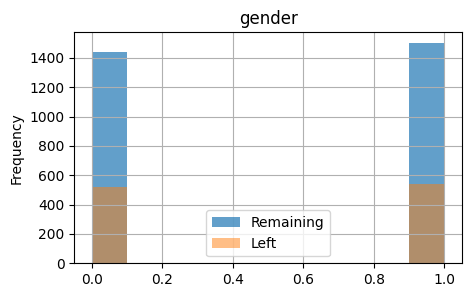

<AxesSubplot: title={'center': 'Near_Location'}, ylabel='Frequency'>

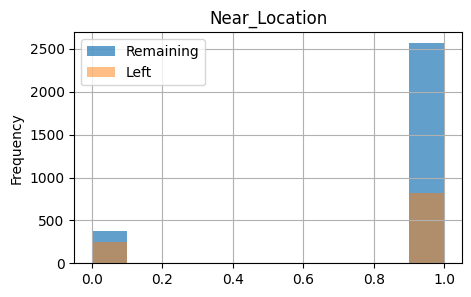

<AxesSubplot: title={'center': 'Partner'}, ylabel='Frequency'>

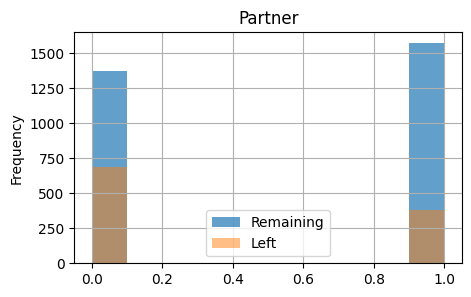

<AxesSubplot: title={'center': 'Promo_friends'}, ylabel='Frequency'>

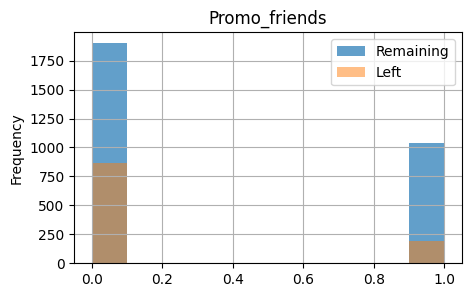

<AxesSubplot: title={'center': 'Phone'}, ylabel='Frequency'>

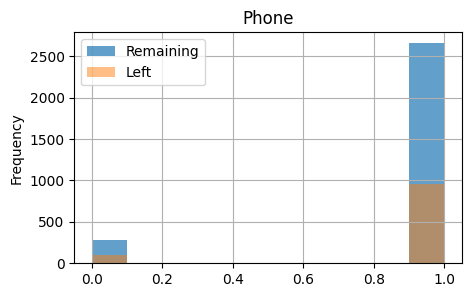

<AxesSubplot: title={'center': 'Contract_period'}, ylabel='Frequency'>

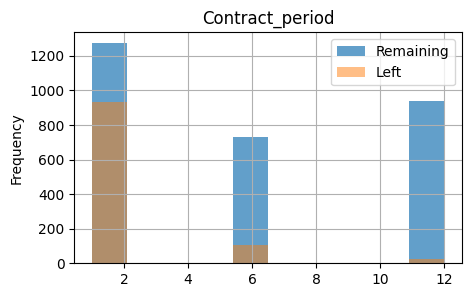

<AxesSubplot: title={'center': 'Group_visits'}, ylabel='Frequency'>

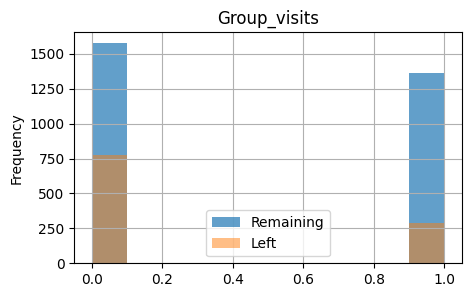

<AxesSubplot: title={'center': 'Age'}, ylabel='Frequency'>

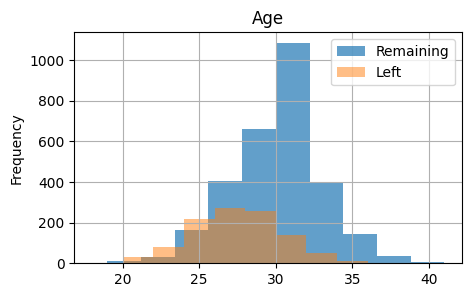

<AxesSubplot: title={'center': 'Avg_additional_charges_total'}, ylabel='Frequency'>

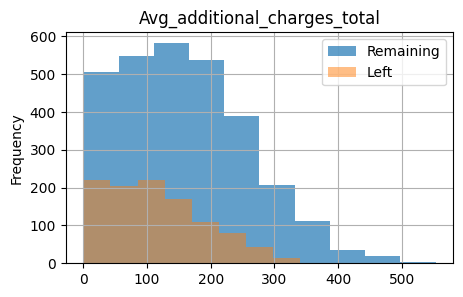

<AxesSubplot: title={'center': 'Month_to_end_contract'}, ylabel='Frequency'>

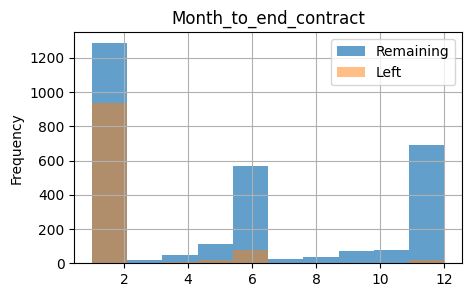

<AxesSubplot: title={'center': 'Lifetime'}, ylabel='Frequency'>

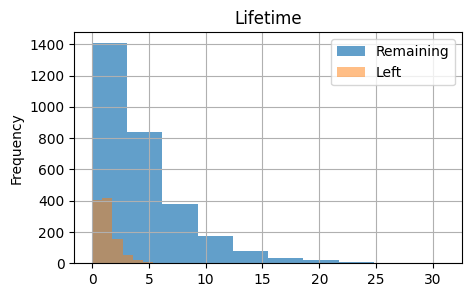

<AxesSubplot: title={'center': 'Avg_class_frequency_total'}, ylabel='Frequency'>

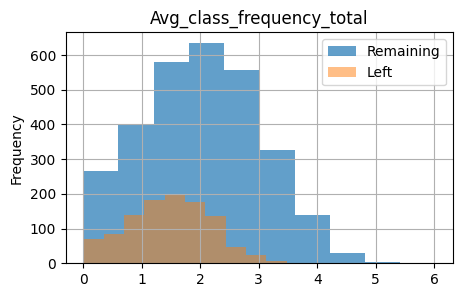

<AxesSubplot: title={'center': 'Avg_class_frequency_current_month'}, ylabel='Frequency'>

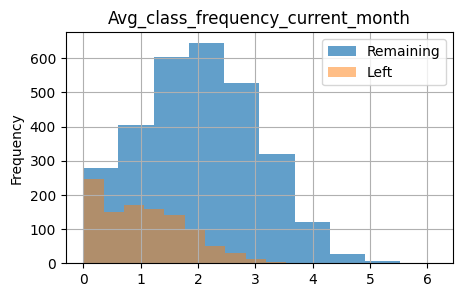

<AxesSubplot: title={'center': 'Churn'}, ylabel='Frequency'>

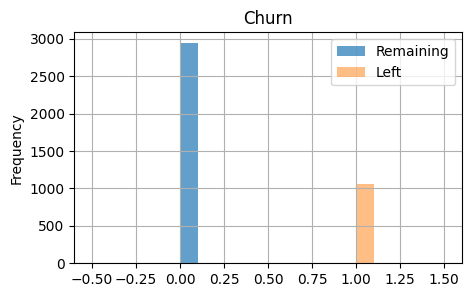

In [93]:
# In the loop, let's run the column names (signs) and build graphs for each of the two groups
for col in gym.columns:
    ax = gym.query('Churn == 0').plot(kind='hist', y=col, 
    alpha=0.7, label='Remaining', figsize = (5,3), title=col)
    gym.query('Churn == 1').plot(kind='hist', y=col,
    alpha=0.5, label='Left', ax=ax, grid=True, legend=True)
    plt.show();

### Comment
Based on the results of visualization, it is possible to draw valuable conclusions for research on many signs, as well as hypotheses about the characteristics of the departed and remaining clients of the fitness center. Let's do this in the summary of the section.

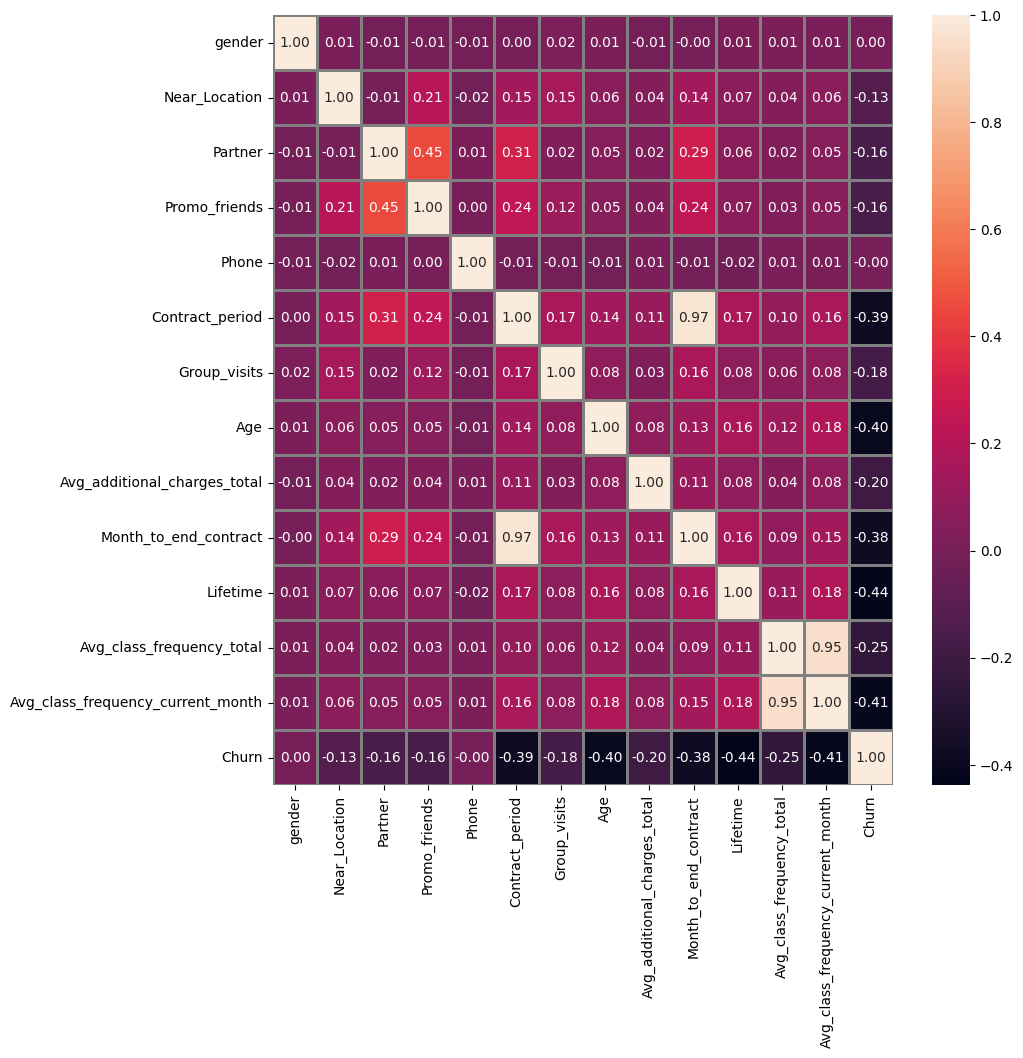

In [94]:
# Build a correlation matrix
cm = gym.corr()
# Visualize a heat map with captions for the correlation matrix
fig = plt.subplots(figsize=(10,10)) 
sns.heatmap(cm, annot = True, fmt='.2f', linewidths=1, linecolor='gray')

plt.show();

### Comment
The most correlating were two groups of signs "contract validity" - "the number of months before the end of the contract" and "average frequency of visits per week for the previous month" - "average frequency of visits per week for all time", which logically is easy to explain. Unfortunately, there are no obvious signs correlating with the outflow of customers on the matrix, which does not indicate their absence, since the data on outflow are categorical and have only two values, which does not affect the matrix in the best way.

### Summary

After conducting a research analysis of the data, you can make a portrait of the average client of a fitness center:

- Equally male or female, the outflow on this basis is the same;
- Mostly lives near the fitness center, those who live further away leave noticeably more often;
- A little more often an employee of a partner company, the outflow of such clients is lower;
- More often is not a participant of the "bring a friend" campaign, the outflow from the participants of the action is lower;
- Almost always provide a contact phone number, the sign most likely does not affect the desire to leave;
- A little more often enters into a short-term contract for 1 month, less often for a year, but almost all of the departed clients have signed short-term contracts;
- Attends group classes a little more often, the outflow among these clients is also higher;
- The average age is 30 years, the departed clients are a little younger, on average they are 27 years old;
- The average expense for other services of the center is 158 units, those who left spent proportionally less;
- The average client who has not left the study has 5.2 months before the end of the contract, and they leave, as a rule, when the contract is already coming to an end - 1.6 months;
- The average amount of time spent since the first visit is 4.7 months for the remaining ones, when the decision to terminate the visit is made by the outgoing ones on average for 1 month;
- The average frequency of visits for all the time and for the past month for the remaining ones does not change - 2 times a week. The number of classes for those who have left is lower and only decreases over time, from the total for the entire period - 1.5 to 1 class per week in the last month.

After conducting an exploratory analysis of the basic properties of the data, we were convinced of the absence of abnormal values, the normal distribution of data, and also established some patterns in them, thanks to which it is possible to form the first hypotheses and build preliminary forecasts for the predisposition to outflow of a certain group of customers. However, let's not rush things and give the machines the right to make their own forecasts, and at the exit we will compare them with human ones.

## Building a customer churn prediction model

In [95]:
# Divide the data into attributes and a target variable
X = gym.drop('Churn', axis=1)
y = gym['Churn']

In [96]:
# Divide the model into training and validation samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [97]:
# Commands into the function to call the necessary metrics
def metrics(y_true, y_pred, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [98]:
# Train the model with logistic regression..
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)
metrics(y_test, predictions, title='Metrics of the logistic regression model')
print('---------------------------------------')

# ..and random forest
rfc_model = RandomForestClassifier(random_state=0)
rfc_model.fit(X_train, y_train)
predictions = rfc_model.predict(X_test)
metrics(y_test, predictions, title='Metrics of the random forest model');

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics of the logistic regression model
	Accuracy: 0.91
	Precision: 0.81
	Recall: 0.81
---------------------------------------
Metrics of the random forest model
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


### Summary

When testing models on a validation sample, the accuracy, precision and recall metrics of the logistic regression model are higher. When making further forecasts, it would be preferable to be based on the results of this particular model.

## Clustering of clients

In [99]:
# Standardizing data
sc = StandardScaler()
X_sc = sc.fit_transform(X)
# Create a table of links between objects
linked = linkage(X_sc, method = 'ward') 

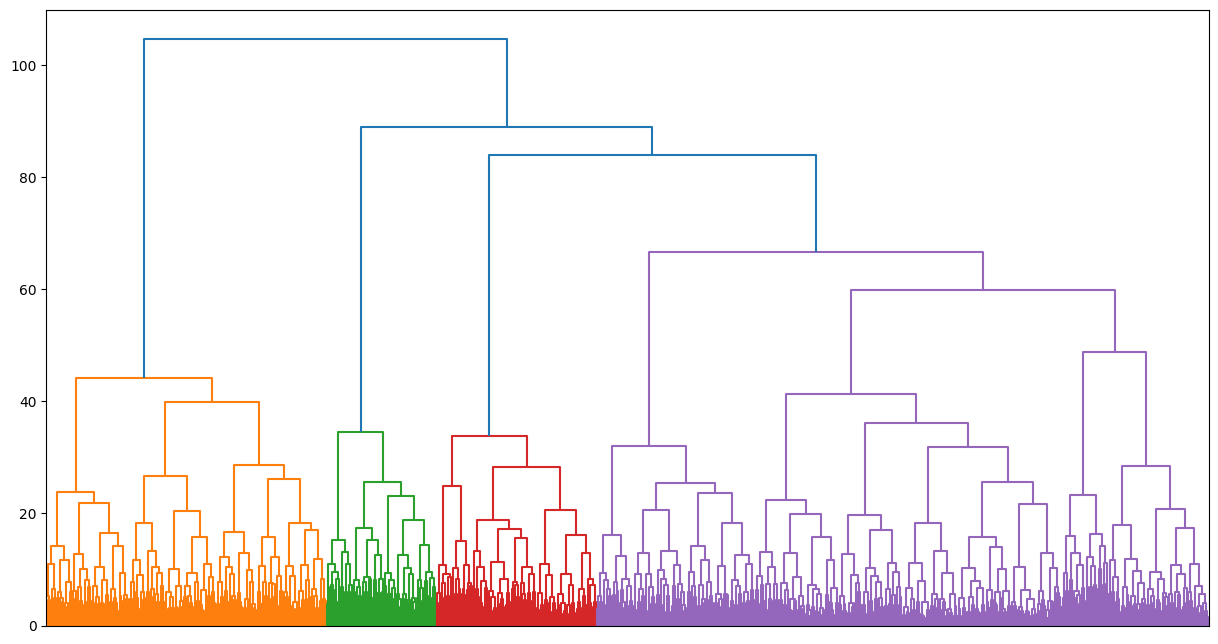

In [100]:
# Build a dendrogram
plt.figure(figsize=(15, 8))  
dendrogram(linked, orientation='top', no_labels=True)
plt.show();

### Comment
Based on the visualization of agglomerative clustering, we obtain the optimal number of clusters proposed by the algorithm - 4. This number of clusters is proposed to the KMeans algorithm.

In [101]:
# Setting the k_means model with the number of clusters equal to 4
km = KMeans(n_clusters = 4, random_state=0)
# Predicting clusters for observations
labels = km.fit_predict(X_sc)

In [102]:
# Create a column in the table with the assigned cluster number and group the data by it, getting their average values
gym['cluster'] = labels
gym_grouped_by_cluster = gym.groupby('cluster').mean().reset_index()
gym_grouped_by_cluster

,cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,1,0.486815,0.759297,0.381339,0.190669,1.0,1.899256,0.292765,28.048005,129.704525,1.805274,2.235294,1.204610,0.951590,0.559838
2,2,0.544939,0.861873,0.343425,0.205298,1.0,2.403027,0.447493,29.989593,157.358764,2.239357,4.704825,2.724796,2.711132,0.092715
3,3,0.503711,0.940631,0.777365,0.572356,1.0,10.697588,0.536178,29.912801,161.363032,9.768089,4.730056,1.983884,1.975592,0.029685


<AxesSubplot: title={'center': 'cluster'}>

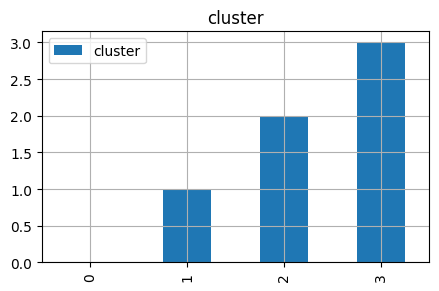

<AxesSubplot: title={'center': 'gender'}>

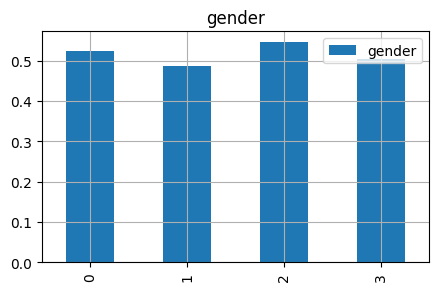

<AxesSubplot: title={'center': 'Near_Location'}>

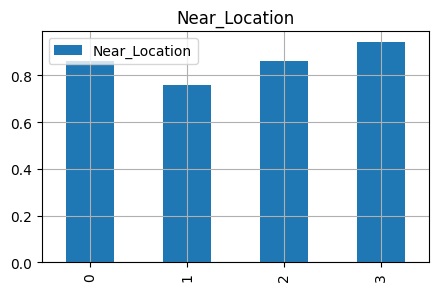

<AxesSubplot: title={'center': 'Partner'}>

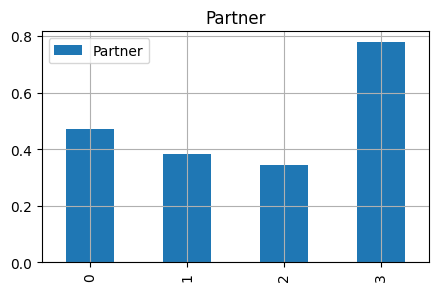

<AxesSubplot: title={'center': 'Promo_friends'}>

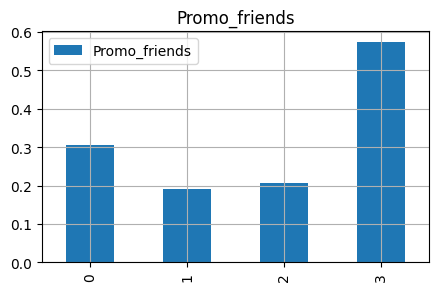

<AxesSubplot: title={'center': 'Phone'}>

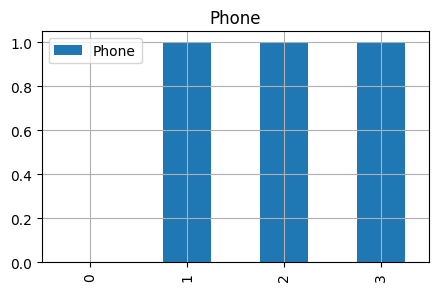

<AxesSubplot: title={'center': 'Contract_period'}>

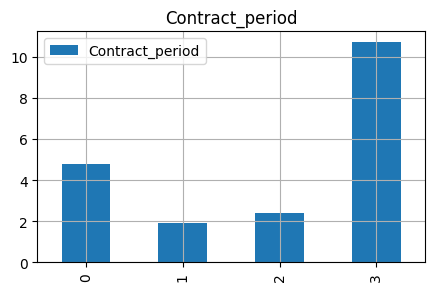

<AxesSubplot: title={'center': 'Group_visits'}>

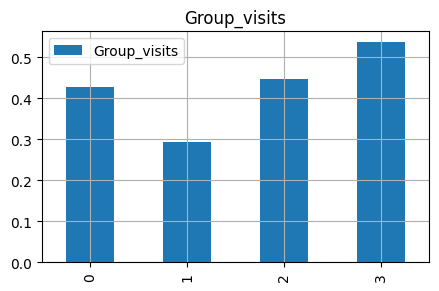

<AxesSubplot: title={'center': 'Age'}>

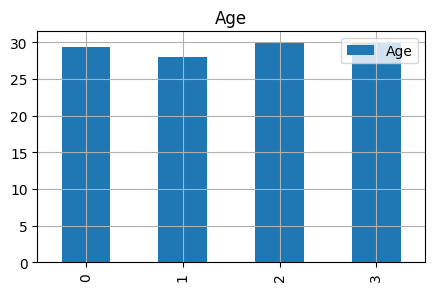

<AxesSubplot: title={'center': 'Avg_additional_charges_total'}>

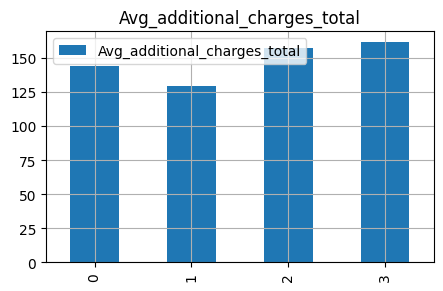

<AxesSubplot: title={'center': 'Month_to_end_contract'}>

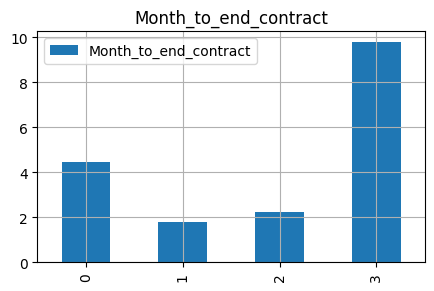

<AxesSubplot: title={'center': 'Lifetime'}>

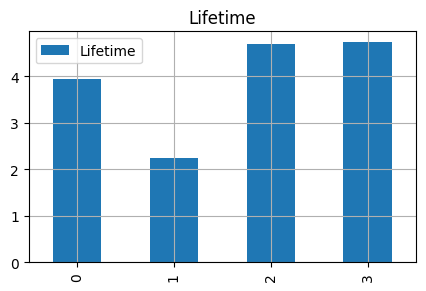

<AxesSubplot: title={'center': 'Avg_class_frequency_total'}>

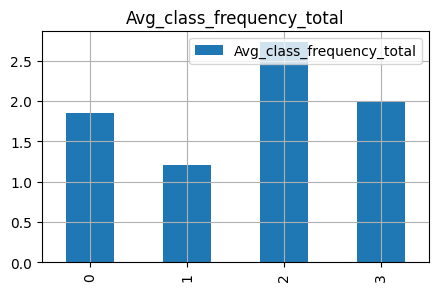

<AxesSubplot: title={'center': 'Avg_class_frequency_current_month'}>

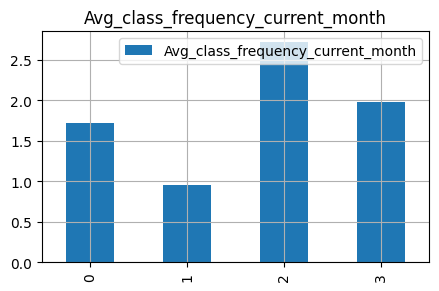

<AxesSubplot: title={'center': 'Churn'}>

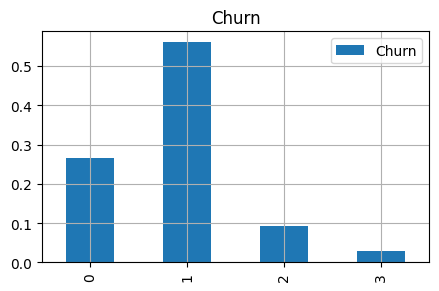

In [103]:
# In the loop, we will build graphs for all features with clustering
for col in gym_grouped_by_cluster.columns:
    gym_grouped_by_cluster.plot.bar(y=col, figsize = (5,3), title=col, grid=True)
    plt.show()

### Comment
Visualization of cluster indicators identified the signs inherent mainly to customers who got into the outflow. Let's take a closer look at the outflow share for each cluster, after which we can draw more specific conclusions.

In [104]:
# Using the summary table, we will calculate the total number of customers, outflow and its share
customer_churn = gym.pivot_table(index= 'cluster', values= 'Churn', aggfunc=['count', 'sum', 'mean'])
customer_churn.columns = ['Количество клиентов', 'Отток', 'Доля оттока']
customer_churn = customer_churn.sort_values(by='Доля оттока', ascending=False)
customer_churn

,Количество клиентов,Отток,Доля оттока
cluster,,,
1,1479,828,0.559838
0,386,103,0.266839
2,1057,98,0.092715
3,1078,32,0.029685


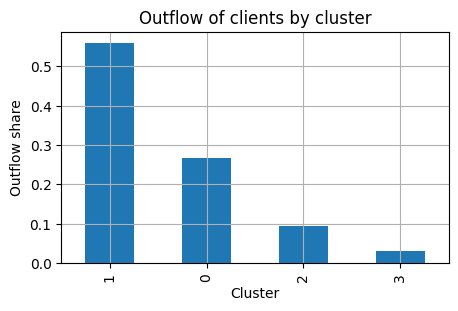

In [105]:
customer_churn['Доля оттока'].plot.bar(
    figsize = (5, 3), grid=True, title='Outflow of clients by cluster')
plt.xlabel('Cluster')
plt.ylabel('Outflow share');

### Comment
Cluster number 1 showed the highest outflow rates. The signs inherent in this group of clients will be considered as alarming, warning about the possible imminent departure of the client. On the contrary, we will consider the signs of the 3rd cluster as inherent in loyal customers.

### Summary

Despite the fact that the breakdown was carried out into 4 clusters, first of all we are interested in the group of clients who have shown themselves to be the most prone to care. Thus, we describe the features inherent mainly to the clients who got into the first cluster:
- The clients of this group live the furthest from the fitness center;
- Most likely, they were not participants in promotions and promo companies;
- Conclude the most short-term contracts;
- Mostly do not attend group classes;
- Have the least time before the end of the contract;
- The first visit was later than the other groups of clients;
- Fewer people visit the fitness center.

The group of customers who got into the third cluster, which proved itself to be the most loyal, naturally has signs that are the opposite of those described above.

Comparing the obtained features with objective reality and proceeding from the principles of logic, we can say that the clustering model worked well. In general, they confirm the hypotheses about the characteristics inherent in outgoing clients, put forward at the stage of exploratory data analysis.

## General Conclusion and Recommendations

In conducting this study, we were based on the results obtained by conducting human and machine analysis. A comparison of the results of the data analysis carried out at the stage of research by the analyst and the results of clustering of clients obtained thanks to the KMeans algorithm did not reveal a significant difference, which may indicate the accuracy of the conclusions and the high quality of the study.

Regularly analyzing the clients of the fitness center, you can divide them into loyal and prone to care.

<b>Signs inherent in loyal customers:</b>
1. Accommodation near the club;
2. Affiliate Program;
3. Visiting promotions and participating in promo companies;
4. Conclusion of a long-term contract;
5. Attending group classes;
6. Currently have a long term until the end of the contract;
7. Consistently visit the center at least twice a week.

<b>Signs inherent in clients prone to care:</b>
1. They live the furthest from the club;
2. Were not participants of promotions and promo companies;
3. Short-term contracts;
4. Do not attend group classes;
5. The contract is coming to an end in the near future;
6. Less often than others visit the fitness center.

<b>With such a division of clients by attributes , the following recommendations can be given:</b>
1. Reallocation of customer retention costs by reducing them for customers characterized as loyal and increasing them for customers prone to leaving;
2. Increasing partner programs with companies to attract loyal customers based on individual offers;
3. Extension of the trial period for participants of the "Bring a Friend" campaign, for deeper involvement and customer bonding;
4. Tracking of clients who have no more than two months left before the expiration of the contract. Offering various discounts and bonuses to those renewing or renegotiating the contract;
5. Tracking clients who lose interest in classes and visit the fitness center less and less. Attracting such customers with special conditions and discounts on other services.
6. Proportional reduction of the contract value when concluding it for a longer period.